In [ ]:
import numpy as np

x_in = np.linspace(-6, 6, 25)
softplus = lambda x: np.log(1 + np.exp(x))
result = softplus(x_in)

fp_convert = lambda x: np.round(x * (2 ** 8))

def pla(x_in, slopes, intercepts, breakpoints):
  result = np.zeros_like(x_in, dtype=float)
  
  result[x_in <= breakpoints[0]] = 0
  result[x_in > breakpoints[-1]] = x_in
  
  for i in range(len(breakpoints) - 1):
    mask = (x_in > breakpoints[i]) & (x_in <= breakpoints[i + 1])
    result[mask] = slopes[i] * x_in[mask] + intercepts[i]
    
  return result

In [3]:
slopes4 = np.array([0.01537, 0.21485, 0.78515, 0.98463])
intercepts4 = np.array([0.09470, 0.69315, 0.69315, 0.09470])
breakpoints4 = np.array([-6, -3, 0, 3, 6])
result4 = pla(x_in, slopes4, intercepts4, breakpoints4)

slopes4_fp = fp_convert(slopes4)
intercepts4_fp = fp_convert(intercepts4)
breakpoints4_fp = fp_convert(breakpoints4)

In [4]:
slopes8 = np.array([0.00571, 0.02503, 0.10188, 0.32782, 0.67218, 0.89812, 0.97497, 0.99429])
intercepts8 = np.array([0.03676, 0.12367, 0.35424, 0.69315, 0.69315, 0.35424, 0.12367, 0.03676])
breakpoints8 = np.array([-6, -4.5, -3, -1.5, 0, 1.5, 3, 4.5, 6])
result8 = pla(x_in, slopes8, intercepts8, breakpoints8)

slopes8_fp = fp_convert(slopes8)
intercepts8_fp = fp_convert(intercepts8)
breakpoints8_fp = fp_convert(breakpoints8)

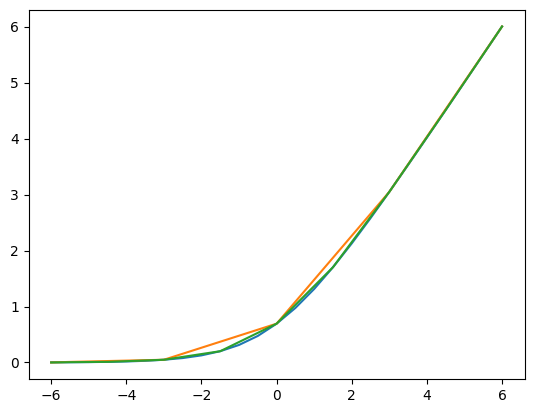

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

res = ax.plot(x_in, result, label='result')
res4 = ax.plot(x_in, result4, label='result4')
res8 = ax.plot(x_in, result8, label='result8')

In [13]:
x_test = np.array([-7, -5, -4, -3, -2, -1.5, -1, 0, 1, 1.5, 2, 3, 4, 5, 7])
result_test = pla(x_test, slopes8, intercepts8, breakpoints8)
print(result_test)

[0.      0.00821 0.02355 0.04858 0.15048 0.20142 0.36533 0.69315 1.36533
 1.70142 2.15048 3.0486  4.02355 5.00821 1.     ]


In [12]:
print(intercepts8_fp)

[  9.  32.  91. 177. 177.  91.  32.   9.]
